In [1]:
# import rozneho potrebneho...

%load_ext autoreload
%autoreload

# %matplotlib inline
%matplotlib nbagg

import numpy as np
from scipy.integrate import odeint

import sys
sys.path.append('./misc/')

from figFcns_nb import *
from kyvadlo_simSch import *

# Meranie prechodových charakteristík

Na rozdiel od práce v rámci predmetu UKYB sa v nasledujúcom, pre ilustráciu merania prechodovej charakteristiky, používa simulovaný systém - kyvadlo (tak ako v predchádzajúcich témach).

Máme nameranú prevodovú charakteristiku, dáta sú uložené v súbore:

In [2]:
prevodChar = np.loadtxt('misc/dataRepo/prevodChar.csv')

Máme však aj model prevodovej charakteristiky. Je ním polynomiálna funkcia (polýnóm 3. stupňa) v tvare

$$
    \hat y =  \Theta_0 + \Theta_1 u + \Theta_2 u^2 + \Theta_3 u^3
$$

kde parametre modelu sú $\Theta_0$, $\Theta_1$, $\Theta_2$ a $\Theta_3$. Ich číselné hodnoty:

In [3]:
theta = np.loadtxt('misc/dataRepo/theta_poly3order.csv')  

# su tu vsak v opacnom poradi oproti tomu co budeme uvazovat v nasledujucom, tak ich otocme:
theta = theta[-1::-1]

Vypočítajme výstup modelu prevodovej charakteristiky pre nasledujúce vstupy:

In [4]:
u_ine = np.arange(0,9.81,0.1).reshape(-1,1)

Vypočítajme (postupne po jednom) výstupy modelu, a zapíšme si ich:

In [5]:
y_model = np.zeros(u_ine.shape)
for idx in range(u_ine.shape[0]):
    for power in range(theta.shape[0]):
        y_model[idx,0] = y_model[idx,0] + (u_ine[idx,0]**power) * theta[power]

Nakreslime

<IPython.core.display.Javascript object>


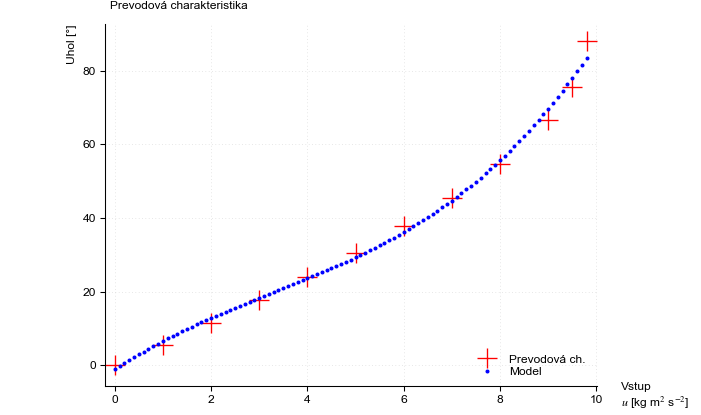

In [6]:
# Obrazok
figNameNum = 7
execfile('misc/figsc_05.py')

Hlavnou úlohou je odmerať prechodové charakteristiky predmetného systému (laboratórny systém) v rôznych pracovných bodoch. Pracovné body nech sú zvolené s prihliadnutím na prevodovú charakteristiku systému.

Ako teda prihliadnuť?

### Stručné vysvetlenie pojmov

Pracovný bod je definovaný ustálenou hodnotou vstupného signálu, ku ktorej (jednoznačne) prislúcha ustálená hodnota výstupného signálu. Dvojica hodnôt, hodnota na vstupe a hodnota na výstupe, tvorí pracovný bod.

Ak je daná ustálená hodnota vstupného signálu, potom je možné pomocou prevodovej charakteristiky nájsť prislúchajúcu ustálenú hodnotu výstupného signálu.

Pojem pracovný bod na seba viaže aj pojem <i>okolie pracovného bodu</i>. V okolí pracovného bodu sú vlastnosti sysemu relatívne rovnaké ako v pracovnom bode. Z hľadiska statických vlastností systému to znamená, že v okolí pracovného bodu sa sklon prevodovej charakteristiky relatívne nemení. Inými slovami, statické zosilnenie systému sa nemení. Rovnako aj dynamické vlastnosti systému sú v okolí pracovného bodu relatívne nemenné - časové konštanty systému sa nemenia.

V dvoch rôznych pracovných bodoch môže mať reálny systém napríklad rozdielne statické zosilnenie, teda statické vlastnosti. Statické zosilnenie systému v pracovnom bode je možné určiť na základe prevodovej charakteristiky. Je dané sklonom prevodovej charakteristiky v okolí pracovného bodu.

Prípadný rozdiel v statických vlastnostiach v rôznych pracovných bodoch však nehovorí nič o prípadnom rozdiele dynamických vlastnostiach systému. Dynamické vlastnosti je možné vyhodnocovať na základe prechodovej charakteristiky.

<i>Prechodová charakteristika</i> je odozva systému na jednotkový skok.

Pod pojmom <i>jednotkový skok</i> sa rozumie skoková zmena signálu (vstupného) a veľkosť tejto zmeny je jednotková. Je jednotková zmysle, že akúkoľvek veľkosť skokovej zmeny má zmysel (prípadne) vyjadriť ako násobok jednotkovej skokovej zmeny. Prirodzene sa predpokladá, že jednotková zmena je taká, že nespôsobí, že systém sa dostane mimo okolia pracovného bodu.

## O meraní prechodovej charakteristiky

Ako už bolo uvedené, používa simulovaný systém - kyvadlo (tak ako v predchádzajúcich témach).

### Voľba pracovných bodov

Zvoľme dva pracovné body:

1.PB: $u=4$ [kg m$^2$ s$^{-2}$] 

2.PB: $u=9,5$ [kg m$^2$ s$^{-2}$] 

Na základe nameraných bodov prevodovej charakteristiky by sme mohli k zvoleným ustáleným vstupným hodnotám priradiť výstupné hodnoty:

1.PB: $y=24,2$ [°] 

2.PB: $y=75,5$ [°] 

Pracujme však s aproximáciou prevodovej charakteristiky, teda s jej modelom. Model nám umožní získať aj také informácie, ktoré neboli reálne namerané.

Pre $u = 4$ [kg m$^2$ s$^{-2}$] podľa modelu prevodovej charakteristiky prislúcha hodnota ustáleného výslupu:

In [7]:
u_PB1 = 4.0
y_PB1 =  theta[0] + theta[1] * u_PB1 + theta[2] * u_PB1**2 + theta[3] * u_PB1**3
print u'y_PB1 = {:6.2f} [°]'.format(y_PB1)

y_PB1 =  23.62 [°]


Pre $u = 9,5$ [kg m$^2$ s$^{-2}$] podľa modelu prevodovej charakteristiky prislúcha hodnota ustáleného výslupu:

In [8]:
u_PB2 = 9.5
y_PB2 = theta[0] + theta[1] * u_PB2 + theta[2] * u_PB2**2 + theta[3] * u_PB2**3
print u'y_PB2 = {:6.2f} [°]'.format(y_PB2)

y_PB2 =  78.07 [°]


Znázornime pracovné body:

<IPython.core.display.Javascript object>


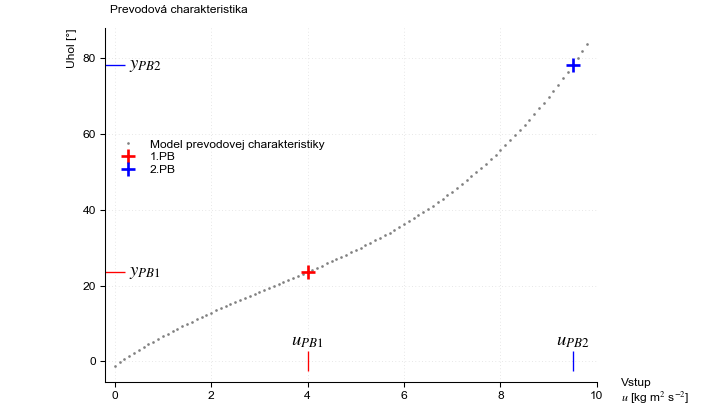

In [9]:
# Obrazok
figNameNum = figNameNum + 1
execfile('misc/figsc_06.py')

Ďalej je, samozrejme, potrebné vhodne zvoliť okolie pracovného bodu (pre každý pracovný bod). V podstate je potrebné voliť pracovný bod a prislúchajúce okolie pracovného bodu naraz. Len tu sme to pre lepšiu názornosť oddelili.

Pripomeňme, že v okolí pracovného bodu sa očakáva, že vlastnosti systému sú relatívne nemenné. Na základe prevodovej charakteristiky možno posúdiť statické vlastnosti systému. Na základe toho, pre 1. pracovný bod (PB1) zvoľme okolie $u = 4 \pm 0,8$ [kg m$^2$ s$^{-2}$]. Pre PB2 zvoľme $u = 9,5 \pm 0,25$ [kg m$^2$ s$^{-2}$]. Znázornime pracovné body a ich okolia:

<IPython.core.display.Javascript object>


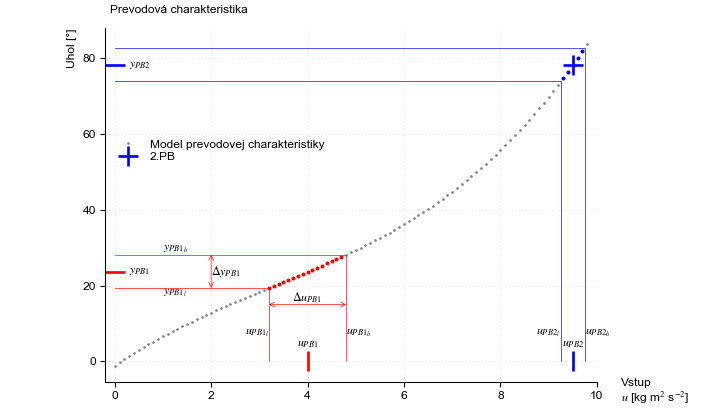

In [10]:
u_PB1_okol = 0.8

y_PB1_h = theta[0] + theta[1] * (u_PB1+u_PB1_okol) + theta[2] * (u_PB1+u_PB1_okol)**2 + theta[3] * (u_PB1+u_PB1_okol)**3
y_PB1_l = theta[0] + theta[1] * (u_PB1-u_PB1_okol) + theta[2] * (u_PB1-u_PB1_okol)**2 + theta[3] * (u_PB1-u_PB1_okol)**3

u_PB2_okol = 0.25

y_PB2_h = theta[0] + theta[1] * (u_PB2+u_PB2_okol) + theta[2] * (u_PB2+u_PB2_okol)**2 + theta[3] * (u_PB2+u_PB2_okol)**3
y_PB2_l = theta[0] + theta[1] * (u_PB2-u_PB2_okol) + theta[2] * (u_PB2-u_PB2_okol)**2 + theta[3] * (u_PB2-u_PB2_okol)**3

# Obrazok
figNameNum = figNameNum + 1
execfile('misc/figsc_07.py')

Ďalej je v tomto prípade potrebné uvážiť veľkosť skokovej zmeny, ktorú budeme používať ako jednotkovú. Vzhľadom na okolnosti nie je dôvod, aby jednotkovou veľkosťou bola hodnota definujúca okolie pracovného bodu. Spĺňa sa tak požiadavka, že jednotkový skok nespôsobí, že systém sa dostane mimo okolia pracovného bodu (bude na hrane, ale nie mimo). Preto pre PB1 nech je jednotková veľkosť skokovej zmeny rovná hodnote `u_PB1_okol` a pre PB2 nech je jednotková veľkosť skoku rovná hodnote `u_PB2_okol`.

### Zrealizovanie merania prechodovej charakteristiky

Aby bolo možné vykonať jednotkový skok (skokovú zmenu vstupného signálu systému s jednotkovou veľkosťou) v okolí pracovného bodu najskôr je potrebné dostať systém do pracovného bodu. Ak bude hodnota vstupného signálu $u_{PB}$, a necháme ju tak nejaký čas, potom očakávame, na základe prevodovej charakteristiky, že výstup systému sa ustáli na hodnote $y_{PB}$. Systém bude v pracovnom bode. Potom je možné skokovo zvýšiť hodnotu vstupného signálu o hodnotu `u_PB1_okol`. Tým sa zrealizuje jednotkový skok v okolí pracovného bodu.

Tabuľka vyjadrujúca želaný priebeh vstupného signálu je nasledovná (prvý stĺpec čas nastavenia hodnoty, druhý stĺpec hodnota):

In [11]:
u_tabulka = np.array([
                [0, u_PB1],
                [10, u_PB1+u_PB1_okol],
                ])

Spustime simuláciu (funkcie realizujúce simulačný model systému (kyvadla) a simulačnú schému sú v súbore `./misc/kyvadlo_simSch.py`)

In [12]:
# Nastavenia simulacie

sim_t_start = 0
sim_t_final = 20
sim_T_s = 0.025
sim_finalIndex = int(((sim_t_final - sim_t_start)/sim_T_s) + 1)

# Simulacia
t_log, x_log, u_log, vystVelicina = fcn_simSch01(sim_t_start, sim_T_s, sim_finalIndex, u_tabulka)

<IPython.core.display.Javascript object>


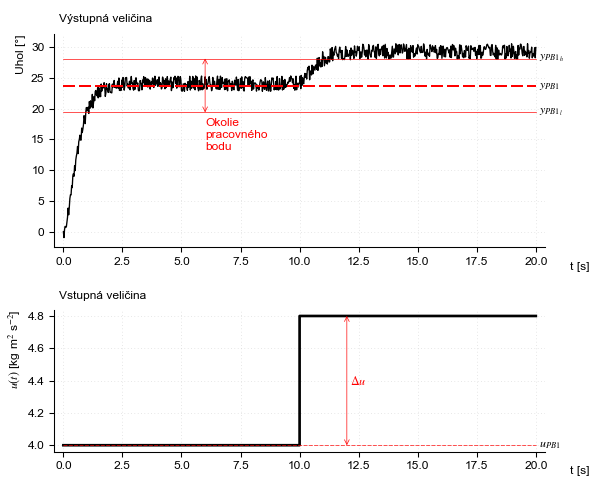

In [13]:
# Obrazok
figNameNum = figNameNum + 1
execfile('misc/figsc_08.py')

Veľkosť skokovej zmeny vstupného signálu je na obrázku označená ako $\Delta u$. V tomto prípade, vzhľadom na zvolené okolie pracovného bodu je $\Delta u = 0,8$.

Jednotkový skok nastal v čase $t=10$ [s]. Pred týmto časom sa systém dostával do pracovného bodu. Od času $t=10$ [s] až pokým sa výstupná veličina systému opäť neustálila prebieha prechodový dej, to je prechodová charakteristika (keďže na vstupe bol jednotkový skok).

### Spracovanie nameraného

Pred jednotkovým skokom sme očakávali, že výstupná veličina sa ustáli na hodnote $y_{PB}$. Podľa modelu prevodovej charakteristiky to pre tento pracovný bod je hodnota:

In [14]:
print u'y_PB1 = {:6.2f} [°]'.format(y_PB1)

y_PB1 =  23.62 [°]


Priemerná hodnota výstupnej veličiny počas doby 5 sekúnd pred jednotkovým skokom je:

In [15]:
temp_Mask = np.logical_and((t_log < 10), (t_log>5))
y_PB1_data = np.mean(vystVelicina[temp_Mask])

print u'y_PB1_data     = {:6.2f} [°]'.format(y_PB1_data) 
print u'y_PB1_odchylka = {:6.2f} [°]'.format(y_PB1_data - y_PB1) + u',   to je {:5.2f} [%]'.format(((y_PB1_data - y_PB1)/y_PB1)*100)

y_PB1_data     =  23.99 [°]
y_PB1_odchylka =   0.37 [°],   to je  1.57 [%]


Odchýlka priemernej hodnoty okolo ktorej sa systém ustálil v pracovnom bode od očakávanej hodnoty podľa modelu prevodovej charakteristiky je približne 1 %. To je samozrejme prijateľná odchýlka. Ďalej teda môžme považovať hodnotu `y_PB1` podľa prevodovej charakteristiky za hodnotu, na ktorej bola ustálená výstupná veličina pred skokovou zmenou vstupného signálu.

Po ukončení prechodového deja sa podľa modelu prevodovej charakteristiky očakáva, že výstupná veličina sa ustáli na hodnote

In [16]:
print u'y_PB1_h     = {:6.2f} [°]'.format(y_PB1_h)

y_PB1_h     =  28.14 [°]


(to je hodnota $y_{PB1_h}$) Už z obr. vyššie je zrejmé, že v skutočnosti sa výstupná veličina ustáli na o niečo vyššej hodnote.

Presnejšie, ak uvažujeme časový úsek po jednotkovom skoku, na ktorom je už výstupná veličina ustálená, nech je to úsek 2,5 až 5 sekúnd po jednotkovom skoku, tak na tomto úseku je priemerná hodnota výstupnej veličiny:

In [17]:
temp_Mask = np.logical_and((t_log <= 15), (t_log>12.5))
y_PB1_h_data = np.mean(vystVelicina[temp_Mask])

print u'y_PB1_h_data     = {:6.2f} [°]'.format(y_PB1_h_data) 

y_PB1_h_data     =  29.29 [°]


Ak pri hodnote $y_{PB1}$ bol rozdiel medzi očakávaným (podľa prevodovej charakteristiky) a nameraným priam zanedbateľný, pri hodnote $y_{PB1_h}$ to už nie je také jednoznačné. Nie je jednoznačné, že rozdiel je zanedbateľný. Tento problém však súvisí s meraním prevodovej charakteristiky a následnou voľbou modelu prevodovej charakteristiky, ktorý sme sa tu rozhodli používať pri odhadovaní očakávaných hodnôt $y_{PB1}$ a $y_{PB1_h}$. Ak sme sa raz rozhodli používať daný model prevodovej charakteristiky, potom s prípadnými odchýlkami, ktoré zjavne nie sú omyly, je potrebné počítať.

Týmto sme chceli povedať, že napriek tomu, že čo sa očakávaných hodnôt týka, po jednotkovom skoku výstupná veličina opustila očakávané okolie pracovného bodu. Avšak je to len očakávané, odhadované okolie (na základe prevodovej charakteristiky). Odchýlky od „reálnych“ hodnôt sú prijateľné a teda môžeme pokračovať bez nutnosti prehodnotiť voľbu okolia pracovného bodu.

#### „Vystrihnutie“ prechodovej charakteristiky

Vyberme z dát na obr. 5 len tú časť, ktorá zodpovedá prechodovej charakteristike, teda dáta od času 10 až po ustálenie (nech je to čas 15). 

<IPython.core.display.Javascript object>


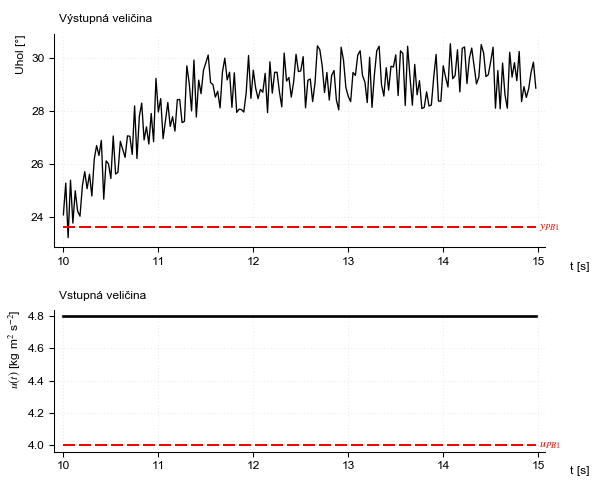

In [18]:
temp_Mask = np.logical_and((t_log >= 10), (t_log <= 15))

surovaPCH_t = t_log[temp_Mask]
surovaPCH_y = vystVelicina[temp_Mask]
surovaPCH_u = u_log[temp_Mask]

# Obrazok
figNameNum = figNameNum + 1
execfile('misc/figsc_09.py')

#### „Posunutie“ prechodovej charakteritiky

Pre potreby ďalšej práce s prechodovou charaketristikou je zvyčajne výhodné posunúť namerané dáta tak aby začiatok prechodovej charakteristiky bol v bode (0,0), to znameá, že PCH začína v  čase 0 a hodnota výstupnej veličiny v začiatku je tiež nula (aspoň filozoficky).

Konkrétne: od získaného priebehu výstupnej veličiny je potrebné odčítať hodnotu $y_{PB}$, pretože tak sa začiatok posunie v smere osi y do nuly (filozoficky... teraz nám to asi bude kaziť šum). Rovnako priebeh vstupnej veličiny je potrebné posunúť v smere osi o hodnotu $u_{PB}$. Samozrejme, od časového vektora je potrebné odčítať čas, v ktorom nastal jednotkový skok.

<IPython.core.display.Javascript object>


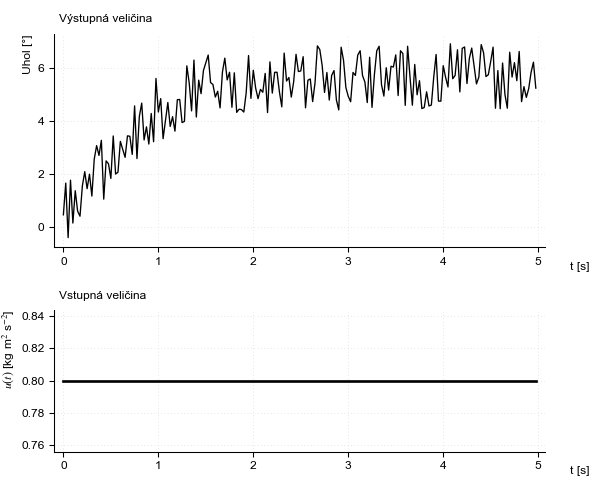

In [19]:
posunutaPCH_t = surovaPCH_t - 10.0
posunutaPCH_y = surovaPCH_y - y_PB1
posunutaPCH_u = surovaPCH_u - u_PB1

# Obrazok
figNameNum = figNameNum + 1
execfile('misc/figsc_10.py')